In [1]:
# magias de ipython
%matplotlib notebook
%load_ext autoreload
%autoreload 2


import warnings
warnings.filterwarnings('ignore')
import resource
soft, hard = resource.getrlimit(resource.RLIMIT_NOFILE)
resource.setrlimit(resource.RLIMIT_NOFILE, (hard, hard))

In [2]:
import __future__
import numpy as np
import sys
from root_numpy import root2array, tree2array
from root_numpy import testdata
import ROOT
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.colors as colors
from scipy.interpolate import interp1d
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable


Welcome to JupyROOT 6.14/00


In [3]:
# estos son unas ntuplas que yo me hice que incluyen 
# los espectros de energia de los neutrinos producto de 
# la aniquilacion de materia oscura en el sol.. 
# no es nada del otro mundo

anumu = ROOT.TFile('../../Ntuples/anumu_dm_2000GeV.root')
numu = ROOT.TFile('../../Ntuples/numu_dm_2000GeV.root')
atmu = ROOT.TFile('../../Ntuples/mupage_sun.root')
data = ROOT.TFile('../../Ntuples/nTupla_DATA_CUTTED.root')




In [4]:
# ahora en python lo que quieres es el un array de numpy
# primero cargas el arbol para eso necesitas el nombre 
# del arbol que en este caso es "antree"
anu = anumu.Get('antree')
nu = numu.Get('antree')
mu = atmu.Get('antree')
da = data.Get('antree')
# Y luego lo conviertes en un arreglo de numpy
anu_arr = tree2array(anu)
nu_arr= tree2array(nu)
mu_arr= tree2array(mu)
da_arr= tree2array(da)

In [5]:
#dates
ymd_min, ymd_max2012, ymd_max2016 = 20072020, 20122020, 20162020 
#direction 
cos_min, cos_max = 0., 1.
#quality
beta_max = 1.
# runs
run_min, run_max = 25800,68170
# lambda 
lam_min, lam_max = -5.3, 0.

# define weights
w_bg_anu  = anu_arr["mc_rbr"]*anu_arr["mc_wc"]*(anu_arr["mc_wH"]+anu_arr["mc_wS"])
w_bg_nu   =  nu_arr["mc_rbr"]* nu_arr["mc_wc"] *(nu_arr["mc_wH"]+ nu_arr["mc_wS"])
# define cuts
mu_cuts2012   = (np.cos(mu_arr["a_th"])>cos_min)&(mu_arr["run"]>run_min)&\
                (mu_arr["ymd"]>ymd_min)&(mu_arr["ymd"]<ymd_max2012)#&(mu_arr["a_beta"]<beta_max)#(mu_arr["a_lambda"]>lam_min)&\

mu_cuts2016   = (np.cos(mu_arr["a_th"])>cos_min)&(mu_arr["run"]>run_min)&\
                (mu_arr["ymd"]>ymd_min)&(mu_arr["ymd"]<ymd_max2016)#&(mu_arr["a_beta"]<beta_max)#(mu_arr["a_lambda"]>lam_min)&\

    
nu_cuts2012   = (nu_arr["ymd"]>ymd_min)&(nu_arr["ymd"]<ymd_max2012)&\
             (np.cos(nu_arr["a_th"])>cos_min)&(np.cos(nu_arr["a_th"])<cos_max)#(nu_arr["a_beta"]<beta_max)#&(nu_arr["a_lambda"]>lam_min)
    
nu_cuts2016   = (nu_arr["ymd"]>ymd_min)&(nu_arr["ymd"]<ymd_max2016)&\
             (np.cos(nu_arr["a_th"])>cos_min)&(np.cos(nu_arr["a_th"])<cos_max)#(nu_arr["a_beta"]<beta_max)#&(nu_arr["a_lambda"]>lam_min)
    
    
anu_cuts2012   = (anu_arr["ymd"]>ymd_min)&(anu_arr["ymd"]<ymd_max2012)&\
              (np.cos(anu_arr["a_th"])>cos_min)&(np.cos(anu_arr["a_th"])<cos_max)#&(anu_arr["a_beta"]<beta_max)#&(anu_arr["a_lambda"]>lam_min)

anu_cuts2016   = (anu_arr["ymd"]>ymd_min)&(anu_arr["ymd"]<ymd_max2016)&\
              (np.cos(anu_arr["a_th"])>cos_min)&(np.cos(anu_arr["a_th"])<cos_max)#&(anu_arr["a_beta"]<beta_max)#&(anu_arr["a_lambda"]>lam_min)
    
da_cuts2012   = (da_arr["ymd"]>ymd_min)&(da_arr["ymd"]<ymd_max2012)&\
              (np.cos(da_arr["a_th"])>cos_min)&(np.cos(da_arr["a_th"])<cos_max)#&(da_arr["a_beta"]<beta_max)#&(da_arr["a_lambda"]>lam_min)

da_cuts2016   = (da_arr["ymd"]>ymd_min)&(da_arr["ymd"]<ymd_max2016)&\
              (np.cos(da_arr["a_th"])>cos_min)&(np.cos(da_arr["a_th"])<cos_max)#&(da_arr["a_beta"]<beta_max)#&(da_arr["a_lambda"]>lam_min)
    

<IPython.core.display.Javascript object>


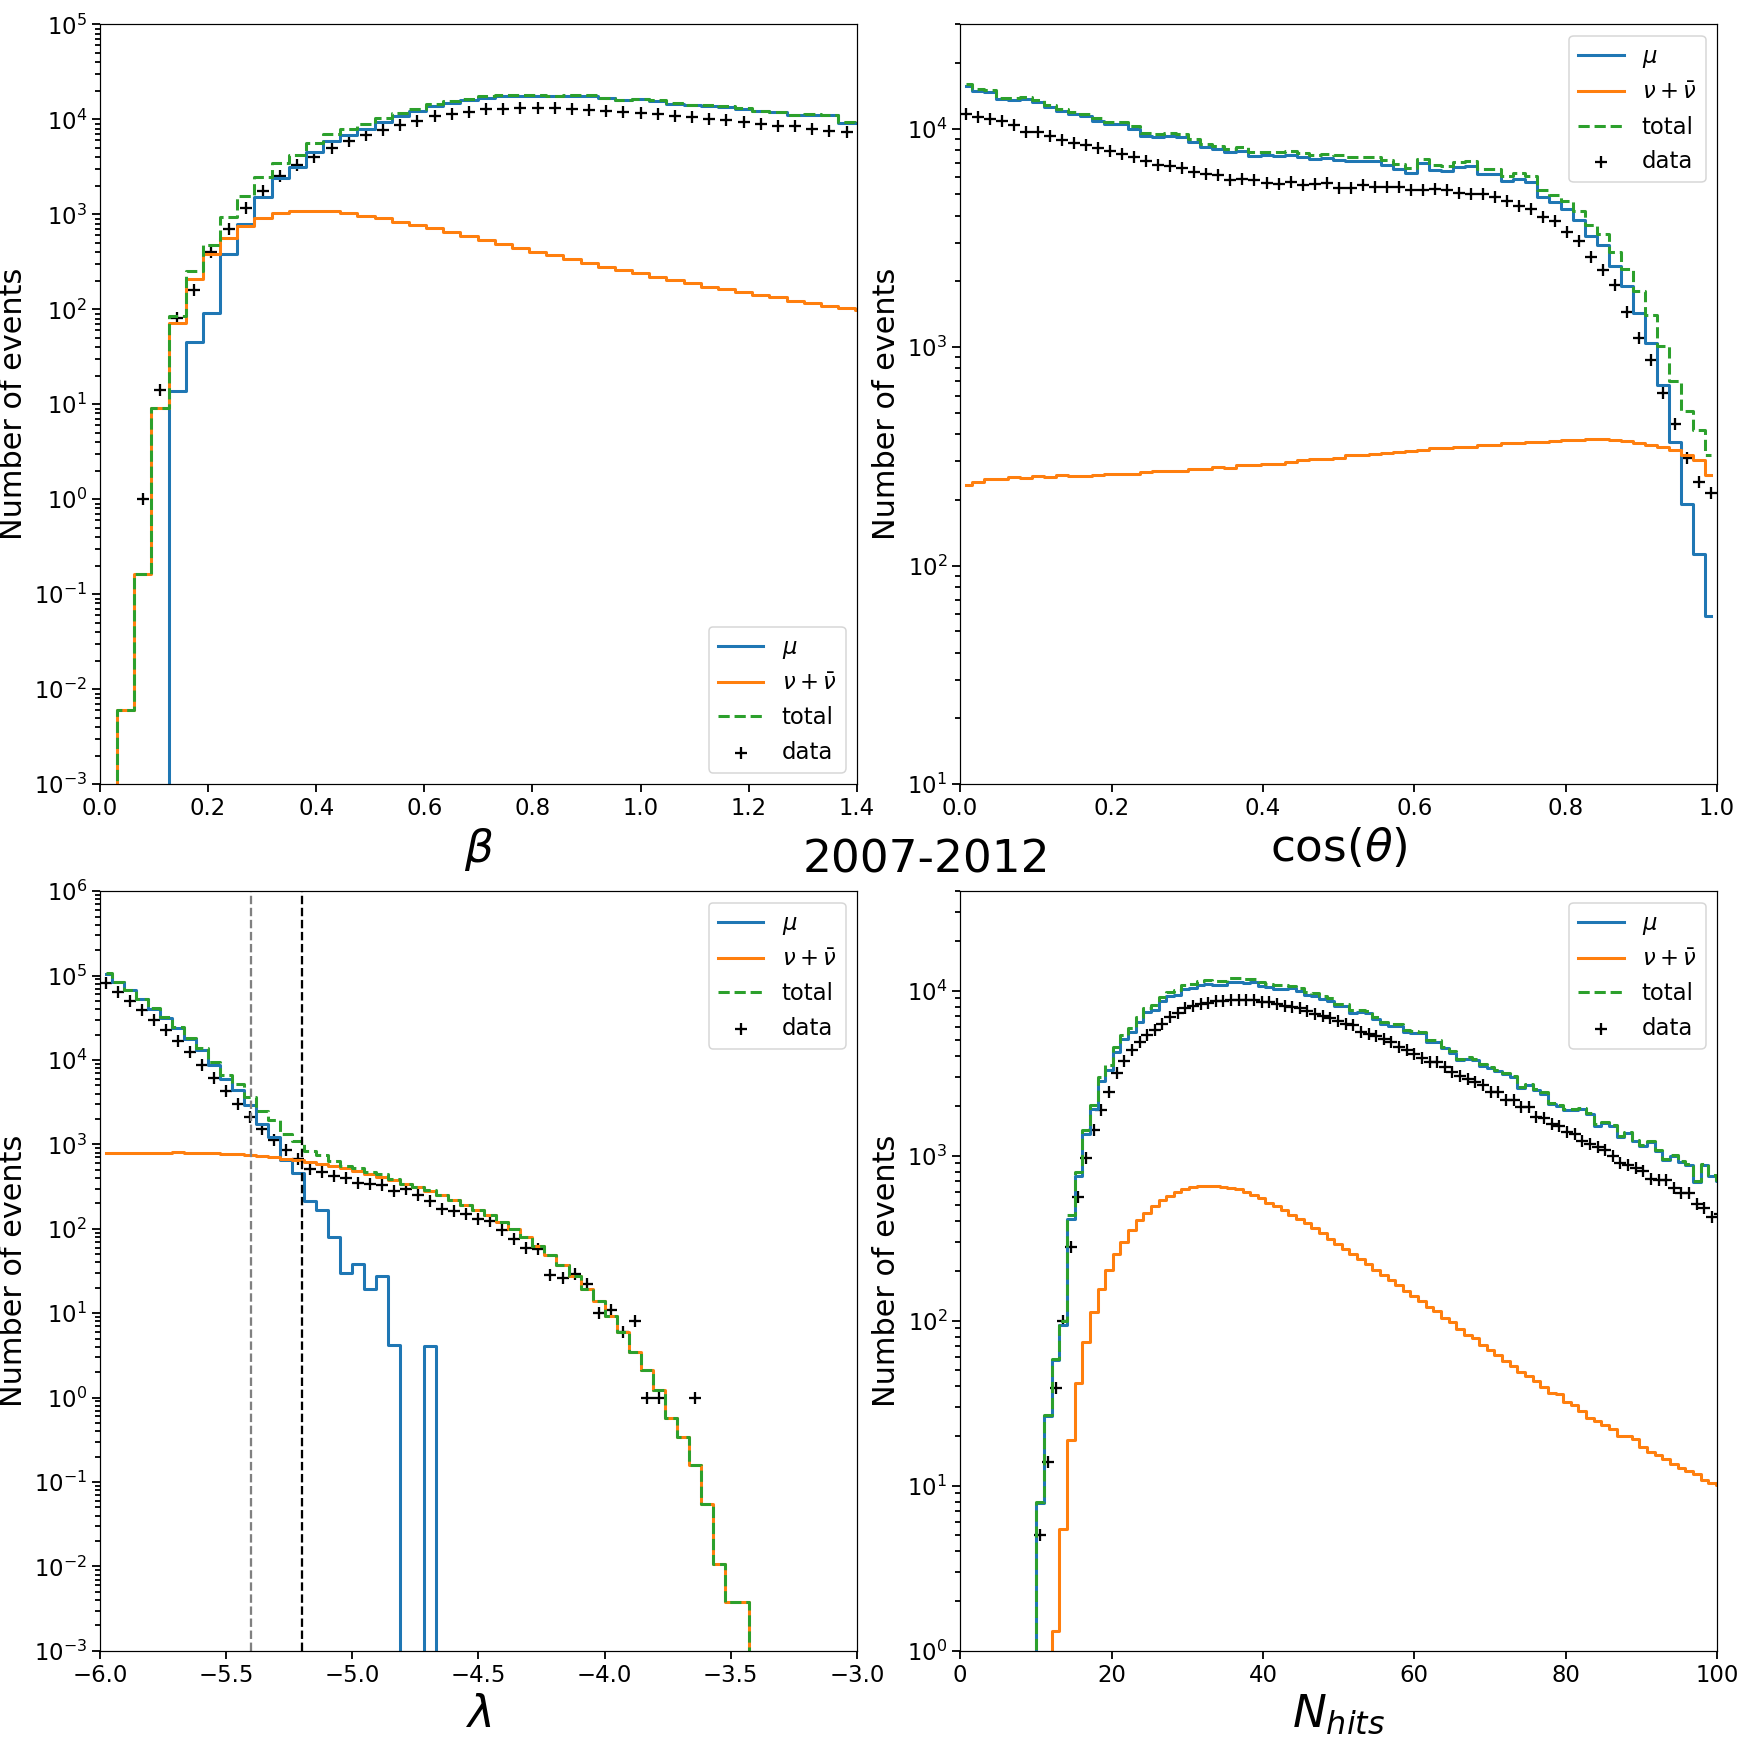

In [6]:
bins = np.linspace(0,2,64)
fonto = 30

bg_mu,x_mu = np.histogram((mu_arr["a_beta"])[mu_cuts2012],bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2012])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram((nu_arr["a_beta"])[nu_cuts2012],bins=bins,weights=w_bg_nu[nu_cuts2012])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((anu_arr["a_beta"])[anu_cuts2012],bins=bins,weights=w_bg_anu[anu_cuts2012])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((da_arr["a_beta"])[da_cuts2012],bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2

fig, ax = plt.subplots(2,2,figsize=[16,16])
fig.text(.46,.5,"2007-2012",fontsize=30)
ax[0,0].set_xlabel(r"$\beta$",fontsize=fonto)
ax[0,0].set_ylabel(r"Number of events",fontsize=20)

ax[0,0].set_yscale("log")
ax[0,0].set_xlim([0,1.4])
ax[0,0].set_ylim([1e-3,1e5])
ax[0,0].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[0,0].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[0,0].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[0,0].scatter(xda_c,bg_da,marker="+",color='k',s=70,lw=1.5,label="data")

legend = ax[0,0].legend(loc='lower right', ncol=1, shadow=False, fontsize=15)
ax[0,0].axvline(x=-5.2,linestyle='--',color='k')
ax[0,0].axvline(x=-5.4,linestyle='--',color='gray')

fig.tight_layout()

bins = np.linspace(-6,-3,64)
bg_mu,x_mu = np.histogram((mu_arr["a_lambda"])[mu_cuts2012],bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2012])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram((nu_arr["a_lambda"])[nu_cuts2012],bins=bins,weights=w_bg_nu[nu_cuts2012])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((anu_arr["a_lambda"])[anu_cuts2012],bins=bins,weights=w_bg_anu[anu_cuts2012])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((da_arr["a_lambda"])[da_cuts2012],bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2

#fig, ax = plt.subplots(figsize=[12,7])
ax[1,0].set_xlabel(r"$\lambda$",fontsize=fonto)
ax[1,0].set_ylabel(r"Number of events",fontsize=20)

ax[1,0].set_yscale("log")
ax[1,0].set_xlim([-6,-3])
ax[1,0].set_ylim([1e-3,1e6])
ax[1,0].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[1,0].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[1,0].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[1,0].scatter(xda_c,bg_da,marker="+",color='k',lw=1.5,s=70,label="data")

legend = ax[1,0].legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
ax[1,0].axvline(x=-5.2,linestyle='--',color='k')
ax[1,0].axvline(x=-5.4,linestyle='--',color='gray')

fig.tight_layout()


bins = np.linspace(0,1,64)

bg_mu,x_mu = np.histogram(np.cos((mu_arr["a_th"])[mu_cuts2012]),bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2012])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram(np.cos((nu_arr["a_th"])[nu_cuts2012]),bins=bins,weights=w_bg_nu[nu_cuts2012])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((np.cos(anu_arr["a_th"])[anu_cuts2012]),bins=bins,weights=w_bg_anu[anu_cuts2012])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((np.cos(da_arr["a_th"])[da_cuts2012]),bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2


#fig, ax1 = plt.subplots(figsize=[7,7])

ax[0,1].set_xlabel(r"$\cos(\theta)$",fontsize=fonto)
ax[0,1].set_ylabel(r"Number of events",fontsize=20)

ax[0,1].set_yscale("log")
ax[0,1].set_xlim([0,1])
ax[0,1].set_ylim([10,30000])

ax[0,1].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[0,1].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[0,1].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[0,1].scatter(xda_c,bg_da,marker="+",color='k',lw=1.5,s=70,label="data")
legend = ax[0,1].legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
ax[0,1].axvline(x=-5.2,linestyle='--',color='k')
ax[0,1].axvline(x=-5.4,linestyle='--',color='gray')




bins = np.linspace(0,120,120)


bg_mu,x_mu = np.histogram((mu_arr["a_nhits"])[mu_cuts2012],bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2012])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram((nu_arr["a_nhits"])[nu_cuts2012],bins=bins,weights=w_bg_nu[nu_cuts2012])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((anu_arr["a_nhits"])[anu_cuts2012],bins=bins,weights=w_bg_anu[anu_cuts2012])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((da_arr["a_nhits"])[da_cuts2012],bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2
fig.tight_layout()
#fig, ax = plt.subplots(figsize=[7,7])

ax[1,1].set_xlabel(r"$N_{hits}$",fontsize=fonto)

ax[1,1].set_ylabel(r"Number of events",fontsize=20)
ax[1,1].set_yscale("log")
ax[1,1].set_ylim([1,40000])
ax[1,1].set_xlim([0,100])

ax[1,1].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[1,1].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[1,1].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[1,1].scatter(xda_c,bg_da,marker="+",color='k',lw=1.5,s=70,label="data")
legend = ax[1,1].legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
ax[1,1].axvline(x=-5.2,linestyle='--',color='k')
ax[1,1].axvline(x=-5.4,linestyle='--',color='gray')

ax[0,0].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[0,0].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[0,1].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[0,1].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[1,1].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[1,1].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[1,0].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[1,0].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
